## Problem Statement
Predicting Survival in the Titanic Data Set
We will be using a decision tree to make predictions about the Titanic data set from Kaggle. 
This data set provides information on the Titanicpassengers and can be used to predict whether a passenger survived or not.

In [1]:
##Loading modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

In C:\Users\hanesha\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\hanesha\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\hanesha\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\hanesha\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\hanesha\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classi

### 1. Loading data

In [2]:
Url='https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv'
titanic = pd.read_csv(Url)
titanic.columns =['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked']


You use only Pclass, Sex, Age, SibSp (Siblings aboard), Parch(Parents/children aboard), and Fare to predict whether a passenger
survived.

In [3]:
titanic=titanic[['Pclass', 'Sex', 'Age', 'SibSp','Parch','Fare','Survived']]
titanic.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,3,male,22.0,1,0,7.2500,0
1,1,female,38.0,1,0,71.2833,1
2,3,female,26.0,0,0,7.9250,1
3,1,female,35.0,1,0,53.1000,1
4,3,male,35.0,0,0,8.0500,0


### 2.Understanding data

In [4]:
titanic.describe()

,Pclass,Age,SibSp,Parch,Fare,Survived
count,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208,0.383838
std,0.836071,14.526497,1.102743,0.806057,49.693429,0.486592
min,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [5]:
## How many classes and its count?
titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

This is a two class problem

In [6]:
#How many passenger class and no of people in each class
titanic['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [7]:
## How many null values
titanic.isnull().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Survived      0
dtype: int64

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

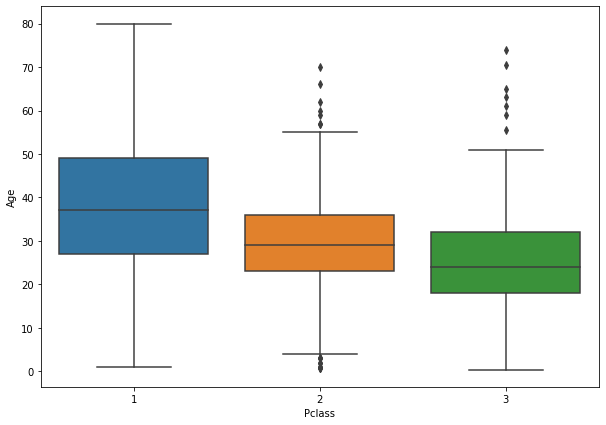

In [8]:
plt.figure(figsize=(10, 7))
sns.boxplot(x='Pclass',y='Age',data=titanic)

In [9]:
titanic.groupby('Pclass')['Age'].mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [10]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 38

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [11]:
titanic['Age'] = titanic[['Age','Pclass']].apply(impute_age,axis=1)

In [12]:
titanic.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Survived    0
dtype: int64

In [13]:
Le=LabelEncoder()
titanic['Sex']=Le.fit_transform(titanic['Sex'])
titanic.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,3,1,22.0,1,0,7.2500,0
1,1,0,38.0,1,0,71.2833,1
2,3,0,26.0,0,0,7.9250,1
3,1,0,35.0,1,0,53.1000,1
4,3,1,35.0,0,0,8.0500,0


In [14]:
Pclass_dummies=pd.get_dummies(titanic['Pclass'],prefix='PClass')
titanic=pd.concat([titanic,Pclass_dummies],axis=1)
titanic.drop('Pclass',axis=1,inplace=True)


In [15]:
##Feature input(X)and Target(y)
X=titanic.drop('Survived',axis=1)
y=titanic['Survived']

In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=100)

In [17]:
DT=DecisionTreeClassifier()
DT.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [18]:
p=list(X.columns)
#q=list(y.unique())
q=list(y.unique().astype(str))

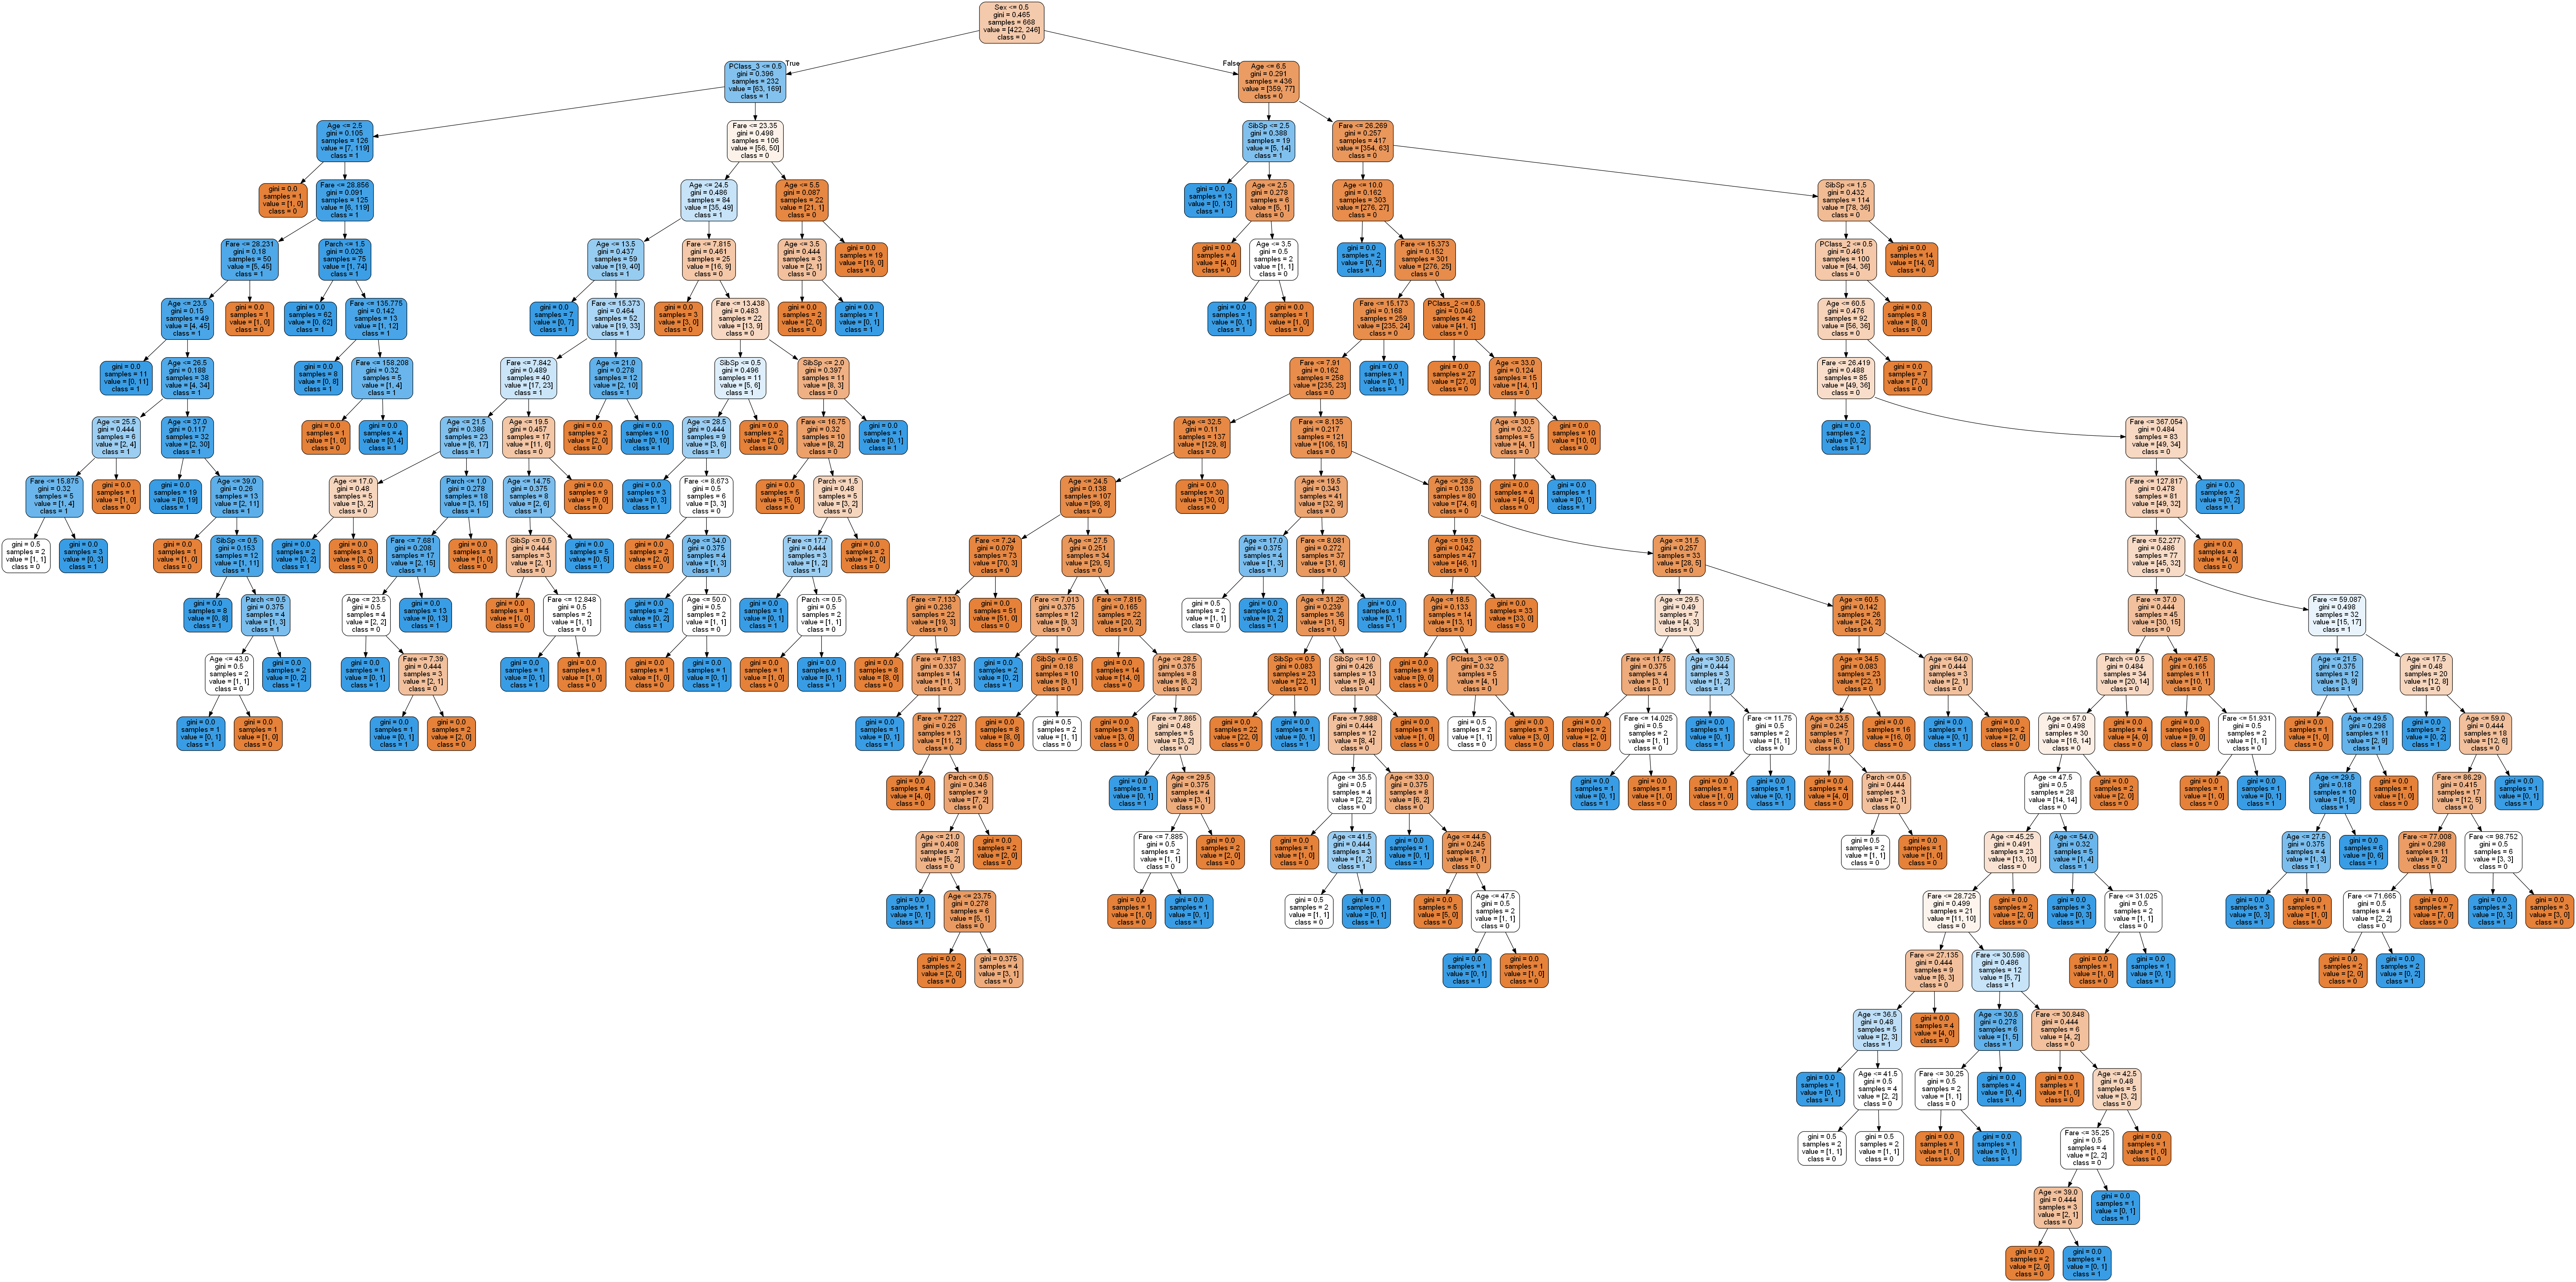

In [19]:
# create a dot_file which stores the tree structure
dot_data = export_graphviz(DT,feature_names = p,class_names =q,rounded = True,filled = True)
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  
graph.write_png("myTree.png")
# Show graph
Image(graph.create_png())

In [20]:
predictions=DT.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.78      0.85      0.81       127
           1       0.77      0.68      0.72        96

    accuracy                           0.78       223
   macro avg       0.78      0.76      0.77       223
weighted avg       0.78      0.78      0.77       223



In [21]:
## Let's check the confusion matrix
confusion_matrix=confusion_matrix(y_test,predictions)
confusion_matrix

array([[108,  19],
       [ 31,  65]], dtype=int64)

In [22]:
print("Accuracy of the model with train data",DT.score(X_train,y_train))
print("Accuracy of the model with test data",DT.score(X_test,y_test))
ytrain_pred = DT.predict_proba(X_train)
roc_train_DT=roc_auc_score(y_train, ytrain_pred[:,1])
print('RF train roc-auc: {}'.format(roc_train_DT))
ytest_pred = DT.predict_proba(X_test)
roc_test_DT=roc_auc_score(y_test, ytest_pred[:,1])
print('RF test roc-auc: {}'.format(roc_test_DT))

Accuracy of the model with train data 0.9865269461077845
Accuracy of the model with test data 0.7757847533632287
RF train roc-auc: 0.9996002388933842
RF test roc-auc: 0.7618930446194225


In [23]:
DT_CVscore=cross_val_score(DT,X,y,cv=5)
DT_CVscore.mean()

0.7755759211600025

In [24]:
params={
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,10,1),
    'min_samples_leaf' : range(1,5,1),
    'min_samples_split': range(2,5,1),
    'splitter' : ['best', 'random']
}

In [25]:
Grid_search=GridSearchCV(DT,params,cv=5,n_jobs=-1)
Grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                     

In [26]:
Grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'splitter': 'best'}

In [27]:
DT_tuned=DecisionTreeClassifier(criterion= 'gini',max_depth= 4,min_samples_leaf= 2,min_samples_split= 2,
                                 splitter= 'best')
DT_tuned.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [29]:
print('Model Accuracy after tuning')
print('------------------------------')
print("Accuracy of the model with train data",DT_tuned.score(X_train,y_train))
print("Accuracy of the model with test data",DT_tuned.score(X_test,y_test))
ytrain_pred = DT_tuned.predict_proba(X_train)
roc_train_tuned=roc_auc_score(y_train, ytrain_pred[:,1])
print('RF train roc-auc: {}'.format(roc_train_tuned))
ytest_pred = DT_tuned.predict_proba(X_test)
roc_test_tuned=roc_auc_score(y_test, ytest_pred[:,1])
print('RF test roc-auc: {}'.format(roc_test_tuned))

Model Accuracy after tuning
------------------------------
Accuracy of the model with train data 0.8532934131736527
Accuracy of the model with test data 0.7757847533632287
RF train roc-auc: 0.902092243671252
RF test roc-auc: 0.8193487532808398


In [30]:
##Let's find the ccp path for the first Decision tree
path=DT.cost_complexity_pruning_path(X_train,y_train)
ccp_alphas,impurities=path.ccp_alphas,path.impurities

In [31]:
ccp_alphas

array([0.        , 0.        , 0.0002495 , 0.00045561, 0.00047777,
       0.000499  , 0.0005988 , 0.0007485 , 0.00085726, 0.0008982 ,
       0.00091484, 0.00097424, 0.0009847 , 0.000998  , 0.000998  ,
       0.000998  , 0.00105942, 0.00108873, 0.00112275, 0.00112275,
       0.00117174, 0.00118204, 0.0011976 , 0.0011976 , 0.0012475 ,
       0.0012475 , 0.00133067, 0.00133178, 0.00134731, 0.00136091,
       0.00139721, 0.00142896, 0.00144354, 0.00145056, 0.00149701,
       0.00151323, 0.00157465, 0.00164671, 0.0017016 , 0.00200049,
       0.00202096, 0.00224551, 0.00230128, 0.00233497, 0.00249501,
       0.00269195, 0.00289638, 0.00342374, 0.00415962, 0.00476521,
       0.00500141, 0.0053153 , 0.00853556, 0.01274364, 0.01510144,
       0.01866812, 0.03852107, 0.13806458])

In [32]:
scores_train=[]
scores_test=[]
for i in ccp_alphas :
    DT3=DecisionTreeClassifier(ccp_alpha=i,random_state=0)
    DT3.fit(X_train,y_train)
    scores_train.append(DT3.score(X_train,y_train))
    scores_test.append(DT3.score(X_test,y_test))

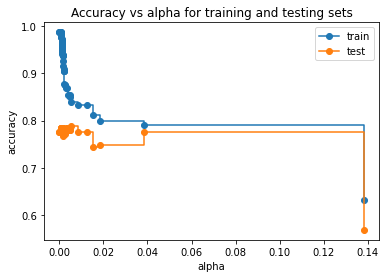

In [33]:
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, scores_train, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, scores_test, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [34]:
DT_pruned=DecisionTreeClassifier(ccp_alpha=0.03852107,random_state=0)
DT_pruned.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.03852107, class_weight=None,
                       criterion='gini', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=0, splitter='best')

In [35]:
print('Model Accuracy after pruning')
print('-------------------------------')
print("Accuracy of the model with train data",DT_pruned.score(X_train,y_train))
print("Accuracy of the model with test data",DT_pruned.score(X_test,y_test))
ytrain_pred = DT_pruned.predict_proba(X_train)
roc_train_pruned=roc_auc_score(y_train, ytrain_pred[:,1])
print('RF train roc-auc: {}'.format(roc_train_pruned))
ytest_pred = DT_pruned.predict_proba(X_test)
roc_test_pruned=roc_auc_score(y_test, ytest_pred[:,1])
print('RF test roc-auc: {}'.format(roc_test_pruned))

Model Accuracy after pruning
-------------------------------
Accuracy of the model with train data 0.7904191616766467
Accuracy of the model with test data 0.7757847533632287
RF train roc-auc: 0.7688513851963165
RF test roc-auc: 0.7624671916010498


In [36]:
pd.DataFrame({'Model':['DT','DT_tuned','DT_pruned'],
              'Train_score':[DT.score(X_train,y_train),
                           DT_tuned.score(X_train,y_train),
                           DT_pruned.score(X_train,y_train)],
              'Test_score':[DT.score(X_test,y_test),
                           DT_tuned.score(X_test,y_test),
                           DT_pruned.score(X_test,y_test)],
              'Roc-auc_train_score':[roc_train_DT,roc_train_tuned,roc_train_pruned],
              'Roc-auc_test_score':[roc_test_DT,roc_test_tuned,roc_test_pruned]
             })

,Model,Train_score,Test_score,Roc-auc_train_score,Roc-auc_test_score
0,DT,0.986527,0.775785,0.999600,0.761893
1,DT_tuned,0.853293,0.775785,0.902092,0.819349
2,DT_pruned,0.790419,0.775785,0.768851,0.762467


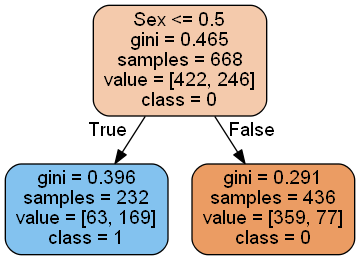

In [37]:
# create a dot_file which stores the tree structure
dot_data = export_graphviz(DT_pruned,feature_names = p,class_names =q,rounded = True,filled = True)
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  
graph.write_png("myTree.png")
# Show graph
Image(graph.create_png())